<a href="https://colab.research.google.com/github/MichaelNovella/cs191tturnin/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST
This is a program that will work with the MNIST dataset using logistic regression and mlp classifier. The first thing to do is call some libraries to work with the reduction and regression. So first we need to call on some libraries to work with.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Here we load in our dataset provided by kaggle into a dataframe and display the columns of the first row.

In [2]:
mnist = pd.read_csv('drive/MyDrive/MnistTrain.csv')
data = mnist.values
print(data.shape)
print (data[1,1:])

(42000, 785)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  30 137 137
 192  86  72   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  16 179 254 254 254
 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254
 104   0   0   0   0   0   0   0   0   0   0   0   0   0  61 191 254 254
 254 254 254 109  83 199 254 254 254 2

Here we print the first number that the first row represents into a 28x28 pixel grid. This also includes a histogram of which labels are most predominate.

[0 0 0 0 0]


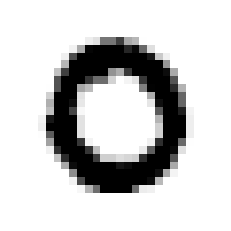

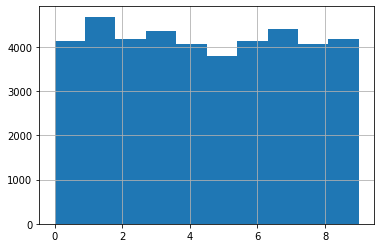

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


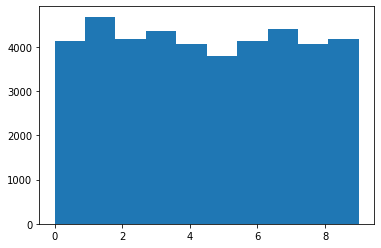

In [ ]:


# print one number
myNumber = data[1,1:]
print (myNumber[:5])
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
mnist['label'].hist()
plt.show()
print(mnist.columns)
plt.hist(data[:,0])
plt.show()



This is just printing out the total length of the data.

In [ ]:
len(data)

42000

This is setting up the logistical regression function that will be used as it is 1000 iteration with the solver being saga. This was done to cut on some runtime during this lab. This will be fitted with every column and row except the label compared to the label for the fitting. 

In [ ]:
clf1 = LogisticRegression(solver='saga', max_iter=1000)
clf1.fit(data[:,1:], data[:, 0] )



The general runtime of the fitting was about 35 minutes. This next section is to bring in the data that will be tested on provided by kaggle and provide the general shape of it and predict from it. 

In [ ]:
mnistTest = pd.read_csv('drive/MyDrive/MnistTest.csv')
test = mnistTest.values
print(test.shape)
predict = clf1.predict(test)


(28000, 784)


From here we will place our predicted label with an image id and put it into kaggle.

In [ ]:
mnistTest.info()
mnistTest.index.name='ImageId'

mnistTest['label']=predict


mnistTest.index +=1

mnistTest.index
mnistTest['label'].to_csv('drive/MyDrive/Mnistlogisticalonly.csv', index=True, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 2 to 28001
Columns: 785 entries, pixel0 to label
dtypes: int64(785)
memory usage: 167.7 MB


The score I got from this is 0.91110. Now I will do the same process of using the logistic regression, but with a multi layered perceptron.

In [ ]:
classifier = MLPClassifier(solver="sgd")
classifier.hidden_layer_sizes = (40,) 
classifier.activation = "logistic"
classifier.fit(data[:,1:], data[:, 0] )

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=(40,), solver='sgd')

Here it only took around 5 minutes to classify the data this could be done with the way it was running on multiple threads or the multiple nodes in the hidden layer

In [ ]:
predict = classifier.predict(test)
mnistTest.info()
mnistTest.index.name='ImageId'

mnistTest['label']=predict


mnistTest.index +=1

mnistTest.index
mnistTest['label'].to_csv('drive/MyDrive/Mnistmlplogistical.csv', index=True, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


The score I got from kaggle was 0.94232 which is an improvement from the last score and is the best to run with. Something that I could have done it try to get rid of the whitespace in the image and focus more on the number of columns or try to do a dimensionality reduction on the columns and from this it wouldn't take as long to process the dataset.